In [4]:
import mcmc_velocity_profile as m
import numpy as np
import matplotlib.pyplot as plt

In [8]:
 # Load T_profile grid (Anna)
AU = 1.5e13  # 1 au = 1.5e13 cm
rs, zs, T_profile = np.load('../ancillary/hd163296_exponential.npy')
r_T = rs[0, :] * AU
z_T = zs[:, 0] * AU
T_profile[T_profile > 1000] = 1000

# r_profile for the model (a fine radial grid)
r_profile = np.linspace(20, 350, 2000) * AU


# Data
surf = np.load('/Users/jea/HD163296/surf_data/HD163296_CO.robust_0.5_ideal.npz')

# Put in cgs units
r_surf = surf['rr1'] * 101 * AU
z_surf = surf['rz1'] * 101 * AU

v_data = np.load('/Users/jea/HD163296/velocity_tests/velocity_curve_CO_iters5_fitmethodSHO.npz')
r_vel = v_data["r"] * 101 * AU
v_vel = v_data["v"] * 100
dv_vel = v_data["dv"] * 100
z_profile = np.interp(r_profile, r_surf, z_surf)
z_data = np.interp(r_vel, r_surf, z_surf)


In [9]:
params = [200*AU, 0.8, 1.2, 
                1e-2*1.989e33, 2.0*1.989e33, 
                0.5, 0.5, 0.5,
                15*AU, 25*AU, 35*AU] 
r_gap_center = [48*AU, 86*AU, 145*AU]
chi2, model, data = m.log_likelihood(params,
                   r_vel, v_vel, dv_vel, z_data,
                   r_profile, z_profile, r_T, z_T, T_profile,
                   r_gap_center)

/Users/jea/densedisk/densedisk/diskmodel.py:138: RuntimeWarning: invalid value encountered in sqrt
  vphi = np.sqrt(v_star_squared + epsilon_p)


In [11]:
chi2

-15214965.065708058

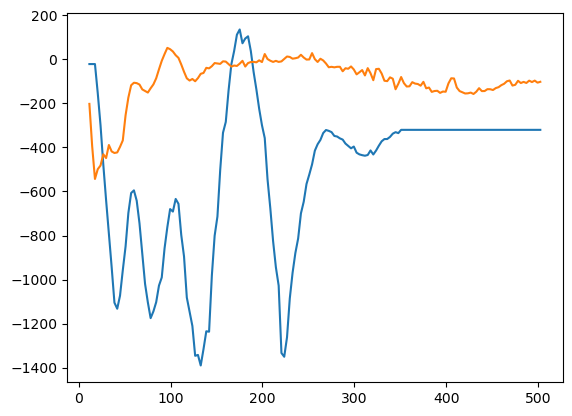

In [10]:
plt.plot(r_vel/AU, model / 100)
plt.plot(r_vel/AU, data / 100)